In [ ]:
# prompt: import main lib for machine learning

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import os

**Import the data from the excel file**

In [ ]:
df = pd.read_excel('dataset1.xlsx')

In [ ]:
df.sample(5)

,target,var1,var2,var3,var4,var5,var6,var7
311,0,509.88,631.079,Micronesia,102.0,315.55,no,2019-03-17 22:59:46
436,0,489.10,507.237,Malaysia,NaN,420.20,yes,2019-07-20 09:27:24
128,1,247.60,260.240,Peru,126.0,346.00,yes,2019-06-17 09:58:46
106,0,385.70,622.049,French Southern Territories,96.0,429.20,no,2019-06-09 21:43:05
891,0,391.12,633.200,Cambodia,NaN,393.35,yes,2019-02-20 09:54:06


Get describtion of the data set

# Discover the dataset

In [ ]:
df.describe()

,target,var1,var2,var4,var5
count,925.000000,925.000000,925.000000,325.000000,925.000000
mean,0.496216,360.116562,548.390134,108.452308,325.393946
std,0.500256,87.866662,135.221460,26.325744,78.862779
min,0.000000,209.560000,139.965000,57.000000,163.000000
25%,0.000000,278.640000,467.373000,87.000000,257.900000
50%,0.000000,367.640000,569.841000,105.000000,342.350000
75%,1.000000,437.600000,652.278000,126.000000,393.000000
max,1.000000,539.920000,794.848000,180.000000,457.150000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  925 non-null    int64  
 1   var1    925 non-null    float64
 2   var2    925 non-null    float64
 3   var3    925 non-null    object 
 4   var4    325 non-null    float64
 5   var5    925 non-null    float64
 6   var6    925 non-null    object 
 7   var7    925 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 57.9+ KB


the **var 4** contains 925-325 =600 record as nulls

# Data Preprocessing

the var3 and var7 could be drop as there are none important feature and of them
is country and other is date


In [ ]:
df.drop(columns=['var3', 'var7'],inplace=True)

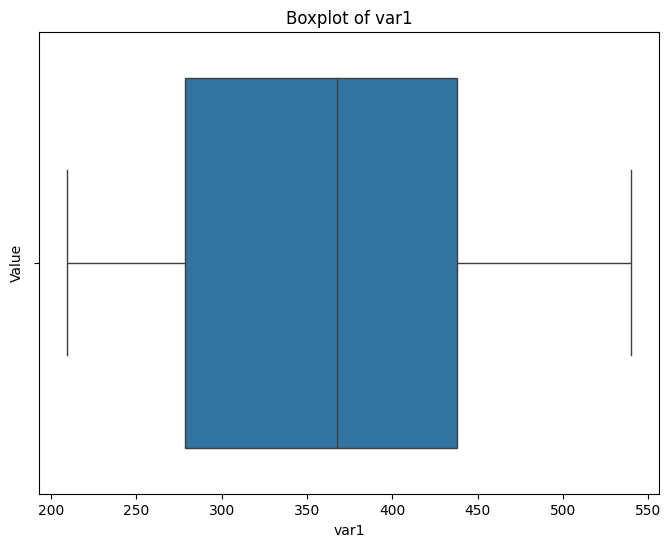

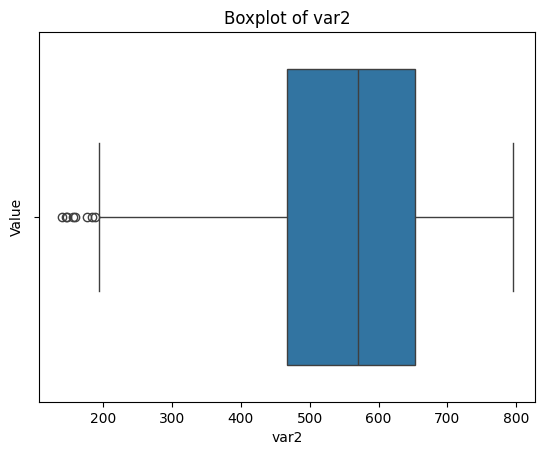

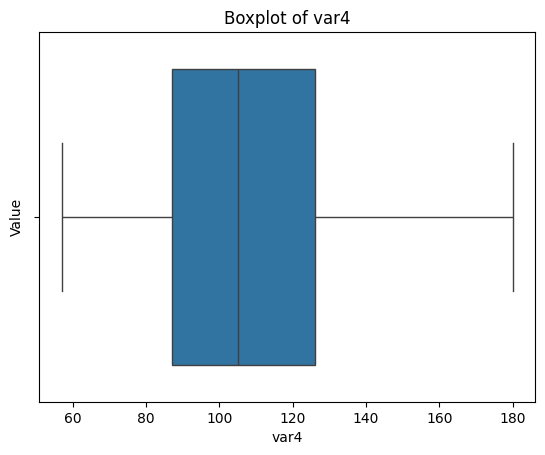

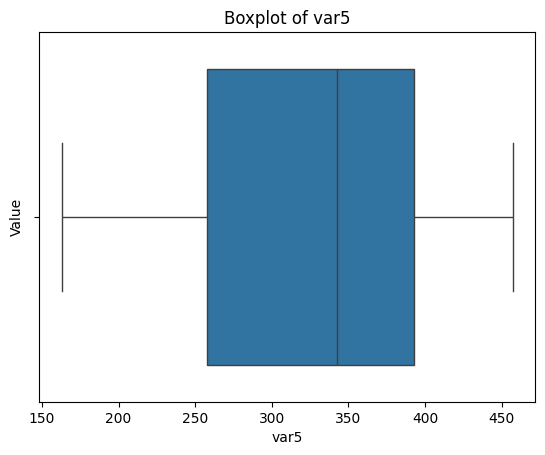

In [ ]:
# prompt: draw boxplot for all column that are numbers to detect the outliers exclude the target

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = [col for col in numeric_columns if col != 'target']
plt.figure(figsize=(8, 6))

for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {col}')
    plt.show()


Discover the values of var4

[138.  81.  90. 102. 105. 111.  78. 129. 147.  69.  87. 114.  75. 132.
  93.  99. 108. 126. 135.  63. 159. 117.  96. 162. 174.  84. 123. 156.
 150.  66. 168. 171. 141.  72. 153.  60. 177.  57. 120. 144. 180.  nan]
var4
87.0     19
114.0    17
93.0     17
96.0     15
117.0    15
99.0     14
105.0    13
135.0    13
132.0    13
102.0    12
90.0     12
75.0     11
84.0     11
123.0    10
126.0    10
81.0     10
111.0    10
78.0      9
129.0     9
120.0     8
108.0     8
156.0     7
138.0     7
72.0      7
69.0      6
147.0     5
162.0     4
63.0      4
153.0     4
144.0     3
60.0      3
159.0     3
150.0     3
174.0     3
141.0     2
66.0      2
57.0      2
171.0     1
168.0     1
177.0     1
180.0     1
Name: count, dtype: int64


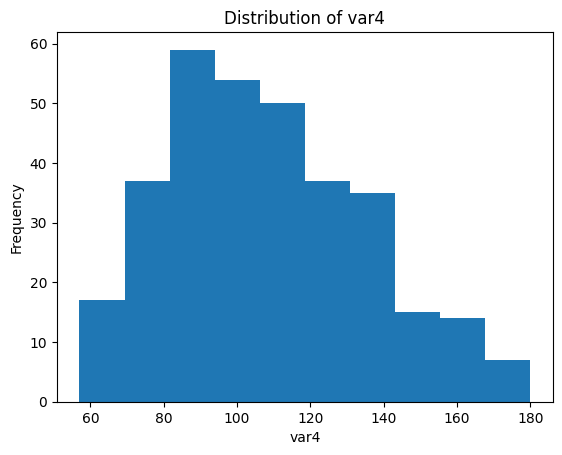

In [ ]:
#discover the patter of var4 how the values look like

# Check the unique values in var4
unique_values = df['var4'].unique()
print(unique_values)

# Check the frequency of each unique value
value_counts = df['var4'].value_counts()
print(value_counts)

# Plot the distribution of var4
plt.hist(df['var4'], bins=10)
plt.xlabel('var4')
plt.ylabel('Frequency')
plt.title('Distribution of var4')
plt.show()


if possible to choose the mean of the the missing var4

In [ ]:
#generate boxplot for var 4

old_var4= df['var4']

In [ ]:
import random
#from sklearn.experimental import enable_iterative_imputer  # noqa
#from sklearn.impute import IterativeImputer
#from sklearn.impute import KNNImputer

#choose the mean of the the missing var4

#mean_value = df['var4'].mean()
#df['var4'] = df['var4'].fillna(mean_value)


#df['var4'].interpolate(method='linear', inplace=True)

#get random value


for index, row in df.iterrows():
  if np.isnan(row['var4']):
      random_sample = old_var4.iloc[random.randrange(len(df['var4'].dropna()))]  # randomly selects a value from original subset.
      df.loc[index, 'var4'] = random_sample  # replaces the nan value with the random sample.

#from sklearn.impute import KNNImputer

#imputer = KNNImputer(n_neighbors=5)
#df['var4'] = imputer.fit_transform(df[['var4']])

#from sklearn.experimental import enable_iterative_imputer  # noqa
#from sklearn.impute import IterativeImputer

#imputer = IterativeImputer(max_iter=10, random_state=0)
#df['var4'] = imputer.fit_transform(df[['var4']])


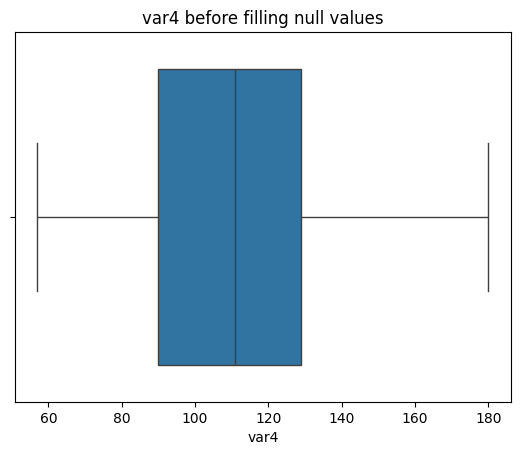

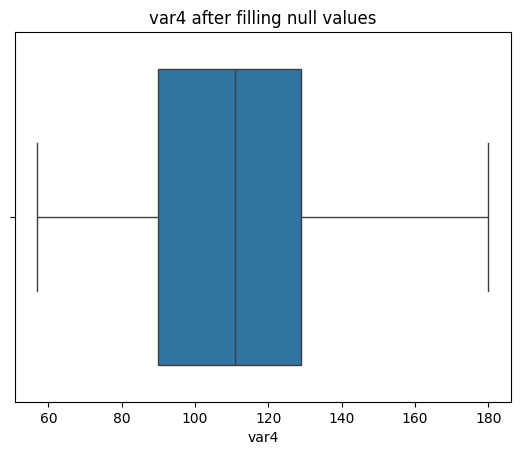

In [ ]:
#generate boxplot for var 4

sns.boxplot(x=old_var4)
plt.title('var4 before filling null values')
plt.show()

sns.boxplot(x=df['var4'])
plt.title('var4 after filling null values')
plt.show()

## Encode the category columns

In [ ]:
print(df.columns)

# One-Hot Encoded for var3
encoded_df = pd.get_dummies(df, columns=['var6'], drop_first=False)
#print(encoded_df.columns)

updated_df = pd.concat([df, encoded_df], axis=1)


Index(['target', 'var1', 'var2', 'var4', 'var5', 'var6'], dtype='object')


In [ ]:
encoded_df.sample(5)

,target,var1,var2,var4,var5,var6_no,var6_yes
680,0,504.14,578.450,102.0,391.45,False,True
859,0,437.58,704.101,87.0,348.90,False,True
363,0,492.12,621.098,111.0,378.55,False,True
797,0,393.52,629.280,132.0,408.35,True,False
424,0,439.82,680.169,132.0,402.75,False,True


In [ ]:
#convert the new column from bool to int
encoded_df['var6_no'] = encoded_df['var6_no'].astype(int)
encoded_df['var6_yes'] = encoded_df['var6_yes'].astype(int)


In [ ]:
encoded_df.sample(5)

,target,var1,var2,var4,var5,var6_no,var6_yes
600,0,411.42,591.061,135.0,392.55,1,0
740,1,246.48,559.849,78.0,283.20,1,0
557,0,327.98,756.875,126.0,357.75,1,0
808,0,448.40,588.202,168.0,382.20,1,0
186,0,482.72,505.064,75.0,349.30,0,1


In [ ]:
# prompt: get columns types of updated_df

encoded_df.dtypes


target        int64
var1        float64
var2        float64
var4        float64
var5        float64
var6_no       int64
var6_yes      int64
dtype: object

## make rescalling for the columns

In [ ]:
# rescalling the column to be align the same scaller

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for col in numeric_columns:
  encoded_df[col] = scaler.fit_transform(encoded_df[[col]])


In [ ]:
encoded_df.sample(5)

,target,var1,var2,var4,var5,var6_no,var6_yes
254,0,0.648323,0.456173,0.317073,0.953935,1,0
443,1,0.379223,0.864220,0.341463,0.191059,0,1
105,1,0.313355,0.199882,0.243902,0.255992,0,1
813,0,0.446362,0.932196,0.365854,0.741118,0,1
681,0,0.916031,0.730472,0.121951,0.617882,0,1


In [ ]:
# get corrlation between feature
encoded_df.corr()


,target,var1,var2,var4,var5,var6_no,var6_yes
target,1.000000,-0.784098,-0.495492,0.214076,-0.747803,-0.044705,0.044705
var1,-0.784098,1.000000,0.344854,-0.169578,0.519466,0.038392,-0.038392
var2,-0.495492,0.344854,1.000000,-0.030776,0.328229,0.003327,-0.003327
var4,0.214076,-0.169578,-0.030776,1.000000,-0.179569,0.013145,-0.013145
var5,-0.747803,0.519466,0.328229,-0.179569,1.000000,-0.017954,0.017954
var6_no,-0.044705,0.038392,0.003327,0.013145,-0.017954,1.000000,-1.000000
var6_yes,0.044705,-0.038392,-0.003327,-0.013145,0.017954,-1.000000,1.000000


In [ ]:
# count how many yes and no in the target

encoded_df['target'].value_counts()


target
0    466
1    459
Name: count, dtype: int64

`the data is near to be balance so no need to do a kind of oversampling or undersampling`

# Training the model

In [ ]:
# Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split

X = encoded_df.drop('target', axis=1)
y = encoded_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (647, 6)
Shape of X_test: (278, 6)
Shape of y_train: (647,)
Shape of y_test: (278,)


In [ ]:
X_train.sample(5)

,var1,var2,var4,var5,var6_no,var6_yes
717,0.724422,0.775800,0.243902,0.758457,1,0
98,0.589539,0.654899,0.024390,0.576067,0,1
609,0.752755,0.812206,0.439024,0.814040,1,0
647,0.603523,0.836591,0.853659,0.407275,1,0
868,0.134217,0.441326,0.219512,0.154683,0,1


In [ ]:
# generate model using decesion tree and use grid search for find the optimal value then use it to train the model

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score # Import the accuracy_score function


# Define the parameter grid
param_grid = {
    'max_depth': np.arange(1, 5),
    'min_samples_split': [2,3,4, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

# Create the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Instantiate the grid search object
grid_search = GridSearchCV(dt_classifier, param_grid)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best hyperparameters:", best_params)

# Train the decision tree classifier with the best hyperparameters
dt_classifier_best = DecisionTreeClassifier(**best_params)
dt_classifier_best.fit(X_train, y_train)

# Evaluate the decision tree classifier on the test data
y_pred_dt = dt_classifier_best.predict(X_test)

# Calculate the accuracy of the decision tree classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print the accuracy of the decision tree classifier
print("Accuracy of the decision tree classifier:", accuracy_dt)


Best hyperparameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3}
Accuracy of the decision tree classifier: 0.9676258992805755


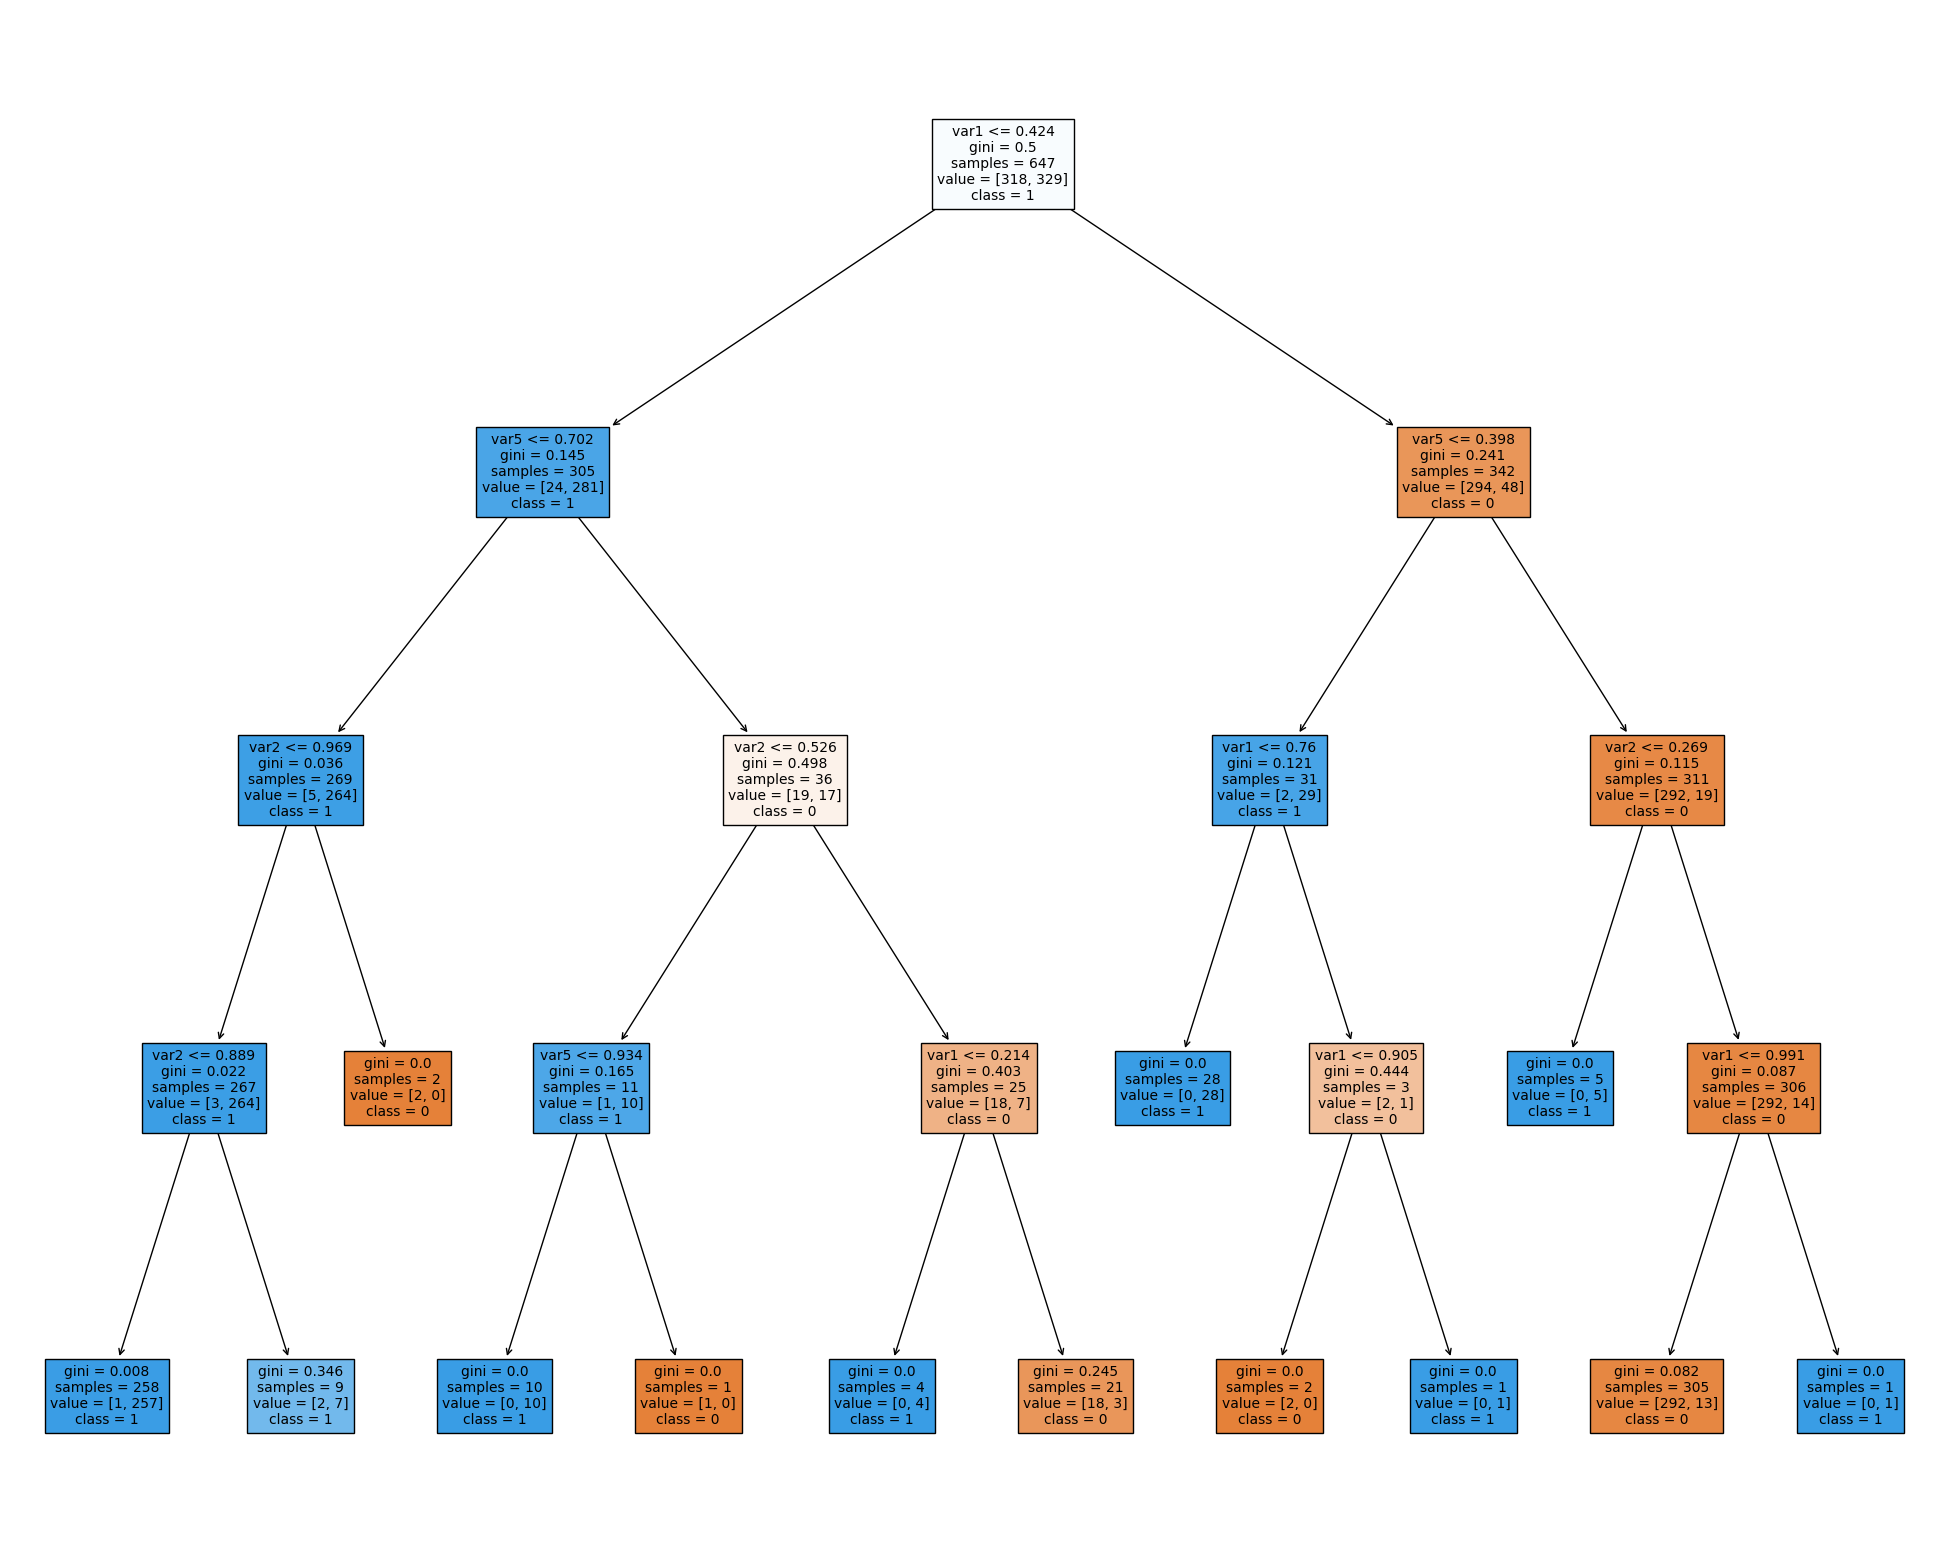

In [ ]:
# draw the decesion tree

from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 20))
tree.plot_tree(dt_classifier_best, feature_names=X.columns, class_names=['0', '1'], fontsize=10, filled=True)
plt.show()


## Random Forst

In [ ]:
# generate model using random forst and use grid search for find the optimal value then use it to train the mode

from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 15,20,30],
    'max_depth': [2,3,4,5,6,7],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 3, 5, 10, 20],
    'min_samples_leaf': [ 2, 4, 6, 8]
}

# Create the random forest classifier
rf_classifier = RandomForestClassifier()

# Instantiate the grid search object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=3)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best hyperparameters:", best_params)

# Train the random forest classifier with the best hyperparameters
rf_classifier_best = RandomForestClassifier(**best_params)
rf_classifier_best.fit(X_train, y_train)

# Evaluate the random forest classifier on the test data
y_pred_rf = rf_classifier_best.predict(X_test)

# Calculate the accuracy of the random forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the accuracy of the random forest classifier
print("Accuracy of the random forest classifier:", accuracy_rf)



Best hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 10}
Accuracy of the random forest classifier: 0.9676258992805755
